In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1-search_results_Biden.csv')
df

,user_country,source,content,date
0,NaN,Twitter for Android,"@realDexJames @JoeBiden Again, they are runnin...",2020-09-29T23:59:59+00:00
1,missing zoe | sam | annie,Twitter for iPhone,@28VOWELS tbh i just hope biden doesn’t say so...,2020-09-29T23:59:59+00:00
2,NaN,Twitter for iPhone,I’m Ridin with Biden...time for the smack down...,2020-09-29T23:59:59+00:00
3,"Virginia, USA",Twitter for iPhone,@DearAuntCrabby Biden will bring it up.,2020-09-29T23:59:59+00:00
4,NYC,Twitter for Android,If Biden asks Trump to elaborate on details of...,2020-09-29T23:59:59+00:00
...,...,...,...,...
1995,NaN,Twitter for Android,@MSNBC Biden can't draw but a 3 car parade and...,2020-09-29T23:56:19+00:00
1996,NaN,Twitter Web App,@SJPFISH Ross Perot on NAFTA Giant Sucking Sou...,2020-09-29T23:56:19+00:00
1997,"Chicago, IL",Twitter Web App,"As the #Trump #Biden #debate takes place, mill...",2020-09-29T23:56:19+00:00
1998,"New Hampshire, USA",Twitter for iPhone,"@CRNC In the real world, Joe Biden is Bluto an...",2020-09-29T23:56:18+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

56296
['@realdexjames', '@joebiden', 'again', ',', 'they', 'are', 'running', 'a', 'biden', 'campaign', '.', 'they', 'runnong', 'a', 'mail', 'in', 'ballot', 'confusion', 'campaign', 'to']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 155.92%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

24192
['running', 'biden', 'campaign', 'runnong', 'mail', 'ballot', 'confusion', 'campaign', 'put', 'pelosi', 'white', 'house', 'full', 'presidental', 'power', 'winner', 'devlared', 'jan', 'pelosi', 'goes']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@joebiden', 199),
 ('@realdonaldtrump', 115),
 ('@kamalaharris', 52),
 ('@ingrahamangle', 29),
 ('@youtube', 21),
 ('@bretbaier', 20),
 ('@donaldjtrumpjr', 16),
 ('@cnn', 16),
 ('@fake_biden', 14),
 ('@steveguest', 14),
 ('@catturd2', 12),
 ('@truth', 12),
 ('@rudygiuliani', 11),
 ('@foxnews', 11),
 ('@thehill', 11),
 ('@jacketrose86', 10),
 ('@anncoulter', 9),
 ('@scaramucci', 9),
 ('@erictrump', 9),
 ('@zimraniaxy', 9)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,Twitter for Android,"@realDexJames @JoeBiden Again, they are runnin...",2020-09-29T23:59:59+00:00,Positive
1,missing zoe | sam | annie,Twitter for iPhone,@28VOWELS tbh i just hope biden doesn’t say so...,2020-09-29T23:59:59+00:00,Negative
2,NaN,Twitter for iPhone,I’m Ridin with Biden...time for the smack down...,2020-09-29T23:59:59+00:00,Positive
3,"Virginia, USA",Twitter for iPhone,@DearAuntCrabby Biden will bring it up.,2020-09-29T23:59:59+00:00,Neutral
4,NYC,Twitter for Android,If Biden asks Trump to elaborate on details of...,2020-09-29T23:59:59+00:00,Positive
...,...,...,...,...,...
1995,NaN,Twitter for Android,@MSNBC Biden can't draw but a 3 car parade and...,2020-09-29T23:56:19+00:00,Positive
1996,NaN,Twitter Web App,@SJPFISH Ross Perot on NAFTA Giant Sucking Sou...,2020-09-29T23:56:19+00:00,Positive
1997,"Chicago, IL",Twitter Web App,"As the #Trump #Biden #debate takes place, mill...",2020-09-29T23:56:19+00:00,Negative
1998,"New Hampshire, USA",Twitter for iPhone,"@CRNC In the real world, Joe Biden is Bluto an...",2020-09-29T23:56:18+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    881
Neutral     676
Negative    443
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 44.05%
Percentage of neutral tweets: 33.80%
Percentage of negative tweets: 22.15%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

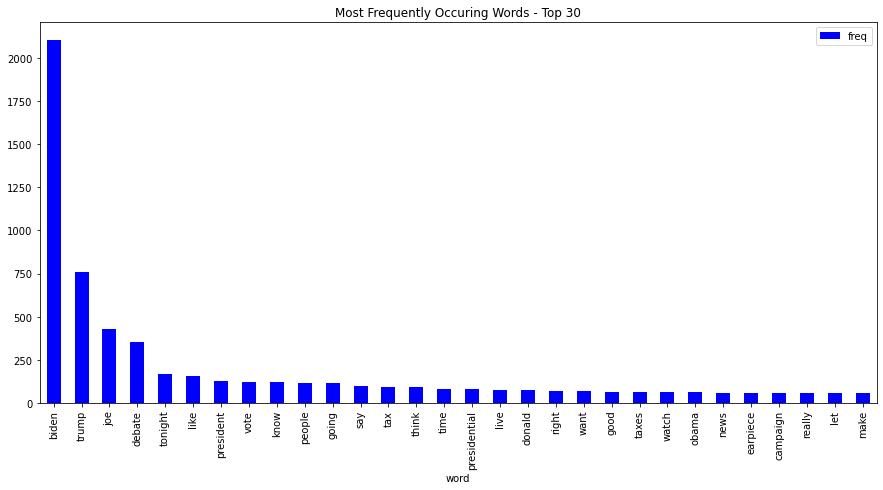

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Biden-Debate1')

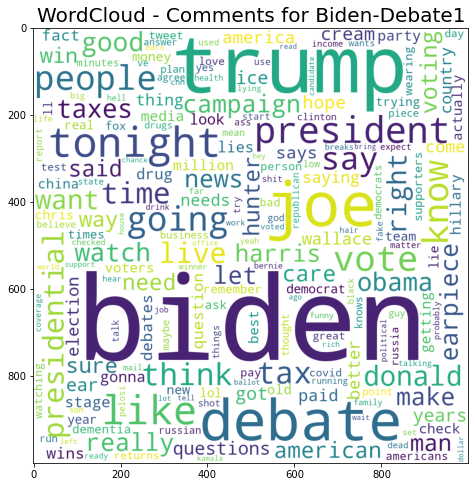

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Biden-Debate1", fontsize = 20)

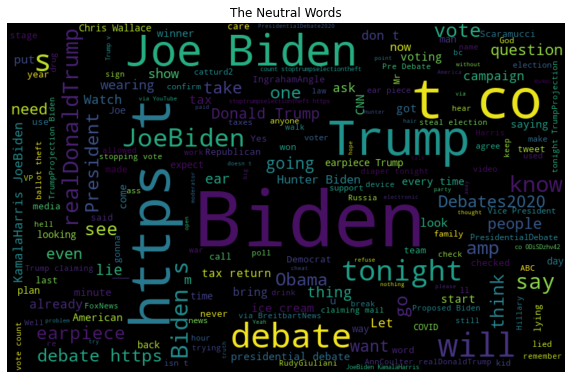

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

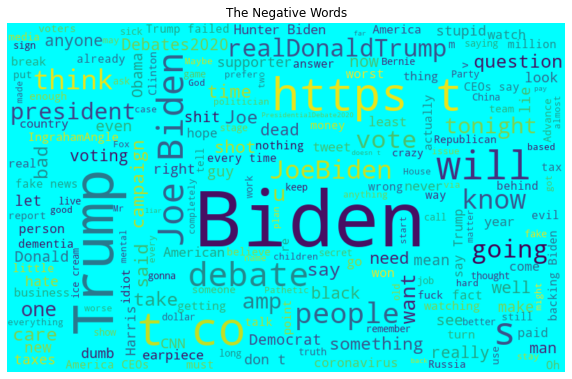

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

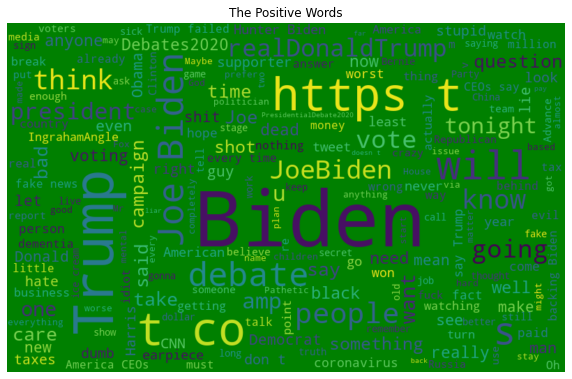

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,"@realDexJames @JoeBiden Again, they are runnin...",Positive
1,@28VOWELS tbh i just hope biden doesn’t say so...,Negative
2,I’m Ridin with Biden...time for the smack down...,Positive
3,@DearAuntCrabby Biden will bring it up.,Neutral
4,If Biden asks Trump to elaborate on details of...,Positive
...,...,...
1995,@MSNBC Biden can't draw but a 3 car parade and...,Positive
1996,@SJPFISH Ross Perot on NAFTA Giant Sucking Sou...,Positive
1997,"As the #Trump #Biden #debate takes place, mill...",Negative
1998,"@CRNC In the real world, Joe Biden is Bluto an...",Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,again they are running a biden campaign they r...
1,Negative,tbh i just hope biden doesn t say some dumb shit
2,Positive,i m ridin with biden time for the smack down i...
3,Neutral,biden will bring it up
4,Positive,if biden asks trump to elaborate on details of...
...,...,...
1995,Positive,biden can t draw but a car parade and trump dr...
1996,Positive,ross perot on nafta giant sucking sound joe bi...
1997,Negative,as the trump biden debate takes place millions...
1998,Positive,in the real world joe biden is bluto and the d...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,again they are running a biden campaign they r...
2,Positive,i m ridin with biden time for the smack down i...
4,Positive,if biden asks trump to elaborate on details of...
7,Positive,pence even better than biden beating trump wil...
9,Positive,t awakening they sure did i m just waiting if ...
...,...,...
1976,Negative,my family receives health insurance through th...
1984,Negative,m trump has a dubious history himself trump is...
1988,Negative,now i hate biden but trump supporters being li...
1991,Negative,i think biden isn t the worst nominee the demo...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,again they are running a biden campaign they r...
2,1,i m ridin with biden time for the smack down i...
4,1,if biden asks trump to elaborate on details of...
7,1,pence even better than biden beating trump wil...
9,1,t awakening they sure did i m just waiting if ...
...,...,...
1976,0,my family receives health insurance through th...
1984,0,m trump has a dubious history himself trump is...
1988,0,now i hate biden but trump supporters being li...
1991,0,i think biden isn t the worst nominee the demo...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [42]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(993, 2)
(331, 2)


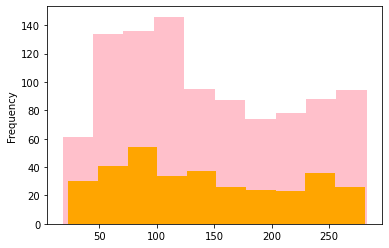

In [43]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [44]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(345212, 538740)

In [45]:
model_w2v.wv.most_similar(positive = "biden")

[('advisers', 0.6879433989524841),
 ('begin', 0.6840685606002808),
 ('choosing', 0.6817976832389832),
 ('approach', 0.680942714214325),
 ('praying', 0.680640697479248),
 ('become', 0.6788858771324158),
 ('pre', 0.6772809028625488),
 ('home', 0.6767280101776123),
 ('strategy', 0.6761457920074463),
 ('idiots', 0.6749016642570496)]

In [46]:
model_w2v.wv.most_similar(negative = "biden")

[('say', -0.40467989444732666),
 ('america', -0.41382908821105957),
 ('tax', -0.42785850167274475),
 ('president', -0.4453158974647522),
 ('vote', -0.4550520181655884),
 ('business', -0.4674924612045288),
 ('election', -0.4680217504501343),
 ('go', -0.469203382730484),
 ('re', -0.4724230170249939),
 ('at', -0.47300320863723755)]

In [47]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [48]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(993, 500)
(993,)
(331, 500)


In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.49244712990936557
F1 score : 0.5058823529411766
[[ 77  42]
 [126  86]]


In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9959718026183283
Validation Accuracy : 0.5830815709969789
f1 score : 0.7076271186440678
[[ 26  93]
 [ 45 167]]


In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4773413897280967
f1 score : 0.4896755162241887
[[ 75  44]
 [129  83]]


In [57]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9144008056394763
Validation Accuracy : 0.6344410876132931
f1 score : 0.7755102040816326
[[  1 118]
 [  3 209]]


In [58]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 conservatives are not kidding democrats cheat it s proven all you have to do is turn the tv on to witness their next conspiracy i was afraid biden would have an ear piece to be feed the answers to him never trust a democrat vote trump juan 

First sample after preprocessing: 
 [ 29  24 199  19   9  32  12  27   3  38   7   2 400  18   3 124   8  39
   1  46  27  61 285 329   3  20   2 330   3  48 140   5 247  63   6   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0

In [62]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [63]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [64]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6577 - accuracy: 0.6361 - val_loss: 0.6191 - val_accuracy: 0.6900
Epoch 2/20
7/7 - 1s - loss: 0.6376 - accuracy: 0.6719 - val_loss: 0.6136 - val_accuracy: 0.6900
Epoch 3/20
7/7 - 1s - loss: 0.6308 - accuracy: 0.6719 - val_loss: 0.6167 - val_accuracy: 0.6900
Epoch 4/20
7/7 - 1s - loss: 0.6267 - accuracy: 0.6719 - val_loss: 0.6134 - val_accuracy: 0.6900
Epoch 5/20
7/7 - 1s - loss: 0.6182 - accuracy: 0.6719 - val_loss: 0.6016 - val_accuracy: 0.6900
Epoch 6/20
7/7 - 1s - loss: 0.6088 - accuracy: 0.6719 - val_loss: 0.5901 - val_accuracy: 0.6900
Epoch 7/20
7/7 - 1s - loss: 0.5893 - accuracy: 0.6719 - val_loss: 0.5713 - val_accuracy: 0.6900
Epoch 8/20
7/7 - 1s - loss: 0.5609 - accuracy: 0.6719 - val_loss: 0.5418 - val_accuracy: 0.6900
Epoch 9/20
7/7 - 1s - loss: 0.5128 - accuracy: 0.6797 - val_loss: 0.5048 - val_accuracy: 0.7400
Epoch 10/20
7/7 - 1s - loss: 0.4574 - accuracy: 0.7615 - val_loss: 0.4779 - val_accuracy: 0.7900
Epoch 11/20
7/7 - 1s - loss: 0.4130 - a

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [67]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,again they are running a biden campaign they r...
1,0,tbh i just hope biden doesn t say some dumb shit
2,1,i m ridin with biden time for the smack down i...
3,-1,biden will bring it up
4,1,if biden asks trump to elaborate on details of...
...,...,...
1995,1,biden can t draw but a car parade and trump dr...
1996,1,ross perot on nafta giant sucking sound joe bi...
1997,0,as the trump biden debate takes place millions...
1998,1,in the real world joe biden is bluto and the d...


In [68]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [69]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [70]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [71]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9986666666666667
Validation Accuracy : 0.454
F1 score : [0.50131926 0.19791667 0.52680653]
[[ 95  28  39]
 [ 42  19  47]
 [ 80  37 113]]


In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9026666666666666
Validation Accuracy : 0.336
f1 score : [0.47282609 0.29761905 0.20945946]
[[ 87  63  12]
 [ 35  50  23]
 [ 84 115  31]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9986666666666667
Validation Accuracy : 0.368
f1 score : [0.43478261 0.19455253 0.42211055]
[[75 45 42]
 [41 25 42]
 [67 79 84]]


In [74]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8486666666666667
Validation Accuracy : 0.514
f1 score : [0.52394366 0.         0.61080074]
[[ 93   0  69]
 [ 34   0  74]
 [ 66   0 164]]


In [78]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [80]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['joe biden or donald trump', 'jeni s is made in ohio the debate is in ohio biden really really loves ice cream', 'if you don t vote for biden you ain t what was it again', 'remember he s the guy tucker on joe biden s latest catchphrase via bideniscrazy', 'biden tonight', 'roch but hey biden and dems would rather lose with ingegrity than win that s been clear for decades', 'abl live september presidential debate between joe biden and don via', 'trump is not biden hilary nancypelosi maxinewaters who have been cheating n circumventing the system to enrich their pockets since the first day in office trump was already rich since his st day in office', 'at what time does biden make his first boom boom in his depenz', 'pm cst won t happen they will find a reason why biden can t do it', 'too bad that bone doesn t say cnn biden harris or clinton on it otherwise i don t see them biting', 'they can t get their story straight they say biden is senile but a sea

In [82]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [83]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 250

In [84]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4881 - accuracy: 0.2178 - val_loss: 0.3082 - val_accuracy: 0.2733
Epoch 2/20
11/11 - 2s - loss: 0.3201 - accuracy: 0.2178 - val_loss: 0.2774 - val_accuracy: 0.2733
Epoch 3/20
11/11 - 2s - loss: 0.3067 - accuracy: 0.2178 - val_loss: 0.2903 - val_accuracy: 0.2733
Epoch 4/20
11/11 - 2s - loss: 0.2873 - accuracy: 0.2178 - val_loss: 0.2575 - val_accuracy: 0.2733
Epoch 5/20
11/11 - 2s - loss: 0.2379 - accuracy: 0.2178 - val_loss: 0.2167 - val_accuracy: 0.2733
Epoch 6/20
11/11 - 2s - loss: 0.0776 - accuracy: 0.2178 - val_loss: 0.0432 - val_accuracy: 0.2733
Epoch 7/20
11/11 - 2s - loss: -3.8806e-01 - accuracy: 0.2178 - val_loss: -4.6062e-01 - val_accuracy: 0.2800
Epoch 8/20
11/11 - 2s - loss: -1.6340e+00 - accuracy: 0.2548 - val_loss: -1.8056e+00 - val_accuracy: 0.3400
Epoch 9/20
11/11 - 2s - loss: -4.6012e+00 - accuracy: 0.3015 - val_loss: -4.6883e+00 - val_accuracy: 0.3467
Epoch 10/20
11/11 - 2s - loss: -1.1322e+01 - accuracy: 0.3407 - val_loss: -1.0413e+01 - 